# Data Analytics Competition Find IT

**Goal:**
Your goal is to anticipate how likely people are to get H1N1 and their yearly flu vaccine. You would specifically forecast two probabilities: one for vaccine_h1n1 and one for vaccine_seasonal. Each row in the data set represents one individual from the 2009 National H1N1 Flu Survey (NHFS) by CDC.

**Needs MUST be done:**
Exploratory Data Analysis (EDA)
Research design
Explanation on EVERY LINE of the code (e.g. print (result) ==> useful for displaying calculation results)

installing package for this project

In [114]:
! pip install ydata-profiling
! pip install fancyimpute
! pip install scikit-multilearn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


Importing all package needed in this project

In [115]:
# common library 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer

import ydata_profiling as dp

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# library for modeling algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# library for model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# library for problem transformation
from skmultilearn.problem_transform import BinaryRelevance

#library for testing
from sklearn.metrics import roc_auc_score


# Removing warnings

import warnings
warnings.filterwarnings('ignore')

# READING CSV

In [116]:
features = pd.read_csv("training_set_features.csv") # assigning data feature to features variable
labels = pd.read_csv("training_set_labels.csv") # assigning data labels to labels variable

# EXPLORATORY DATA ANALYSIS (EDA)

look at 5 first row of the features and labels

In [117]:
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [118]:
labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


checking the descriptive statistics from the dataset

In [119]:
features.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


checking the shape or dimension of features and labels

In [120]:
print(features.shape)
print(labels.shape)

(26707, 36)
(26707, 3)


checking the data type and count of each variable in features and labels

In [121]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [122]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


# Visualization

merge lables and featues to one data frame for easier visualization

In [123]:
df = pd.merge(features, labels)

<AxesSubplot: xlabel='h1n1_vaccine', ylabel='count'>

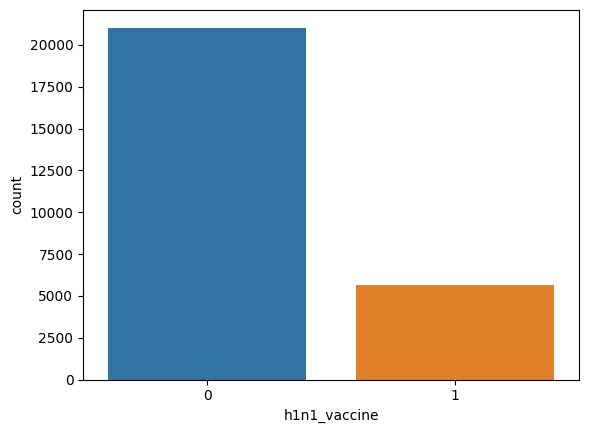

In [124]:
sns.countplot(x=labels['h1n1_vaccine'])

from the plot above we can see that the more people not vaccined.

<AxesSubplot: xlabel='seasonal_vaccine', ylabel='count'>

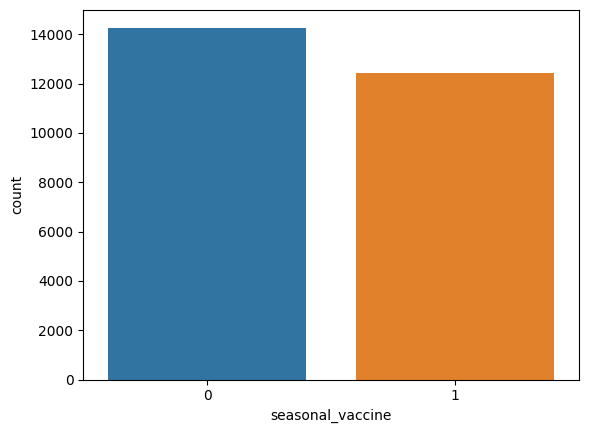

In [125]:
sns.countplot(x=labels['seasonal_vaccine'])

as for seasonal, almost 1:1 ratio of people that have vaccined but majority still not vaccined

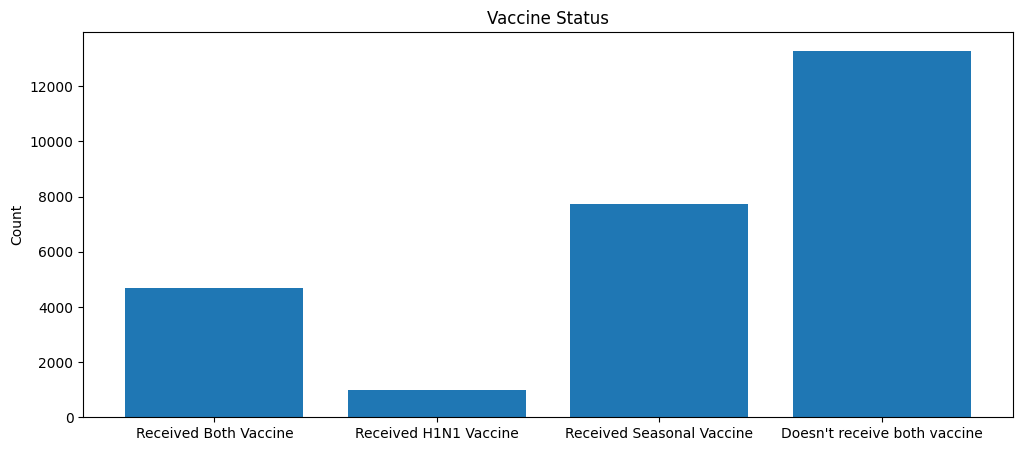

In [126]:
seasonal_h1n1 = len(df[df.seasonal_vaccine == 1][df.h1n1_vaccine == 1])
h1n1 = len(df[df.seasonal_vaccine == 0][df.h1n1_vaccine == 1])
seasonal = len(df[df.seasonal_vaccine == 1][df.h1n1_vaccine == 0])
not_seasonal_h1n1 = len(df[df.seasonal_vaccine == 0][df.h1n1_vaccine == 0])

compareSeasonalH1n1 = pd.DataFrame({"label":["Received Both Vaccine", "Received H1N1 Vaccine", "Received Seasonal Vaccine", "Doesn't receive both vaccine"], "value":[seasonal_h1n1, h1n1, seasonal, not_seasonal_h1n1]})
plt.figure(figsize = (12,5))
plt.bar(compareSeasonalH1n1["label"],compareSeasonalH1n1["value"])
plt.title("Vaccine Status")
plt.ylabel("Count")
plt.show()

from the chart, we can see that many people not having any vaccine at all and and more people decided to only received seasonal vaccine

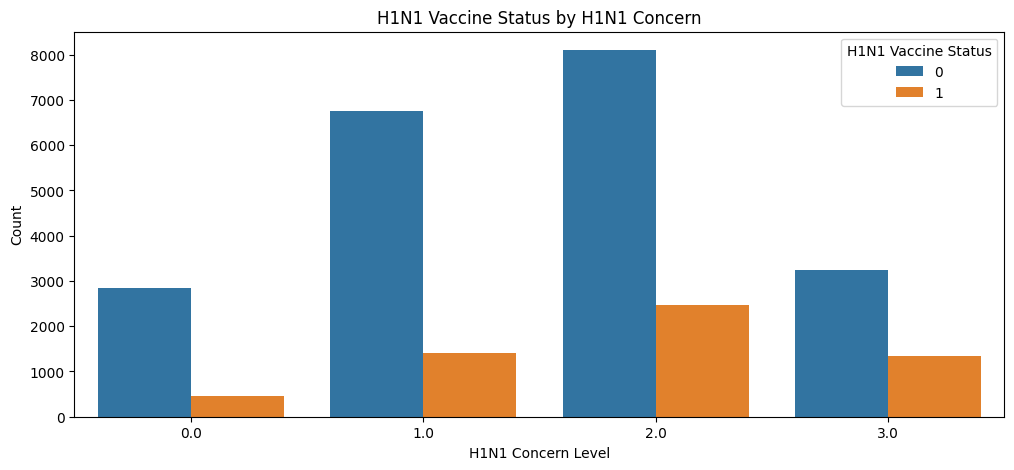

In [127]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="h1n1_concern", hue=df["h1n1_vaccine"])
plt.title("H1N1 Vaccine Status by H1N1 Concern")
plt.xlabel("H1N1 Concern Level")
plt.ylabel("Count")
plt.legend(title='H1N1 Vaccine Status')

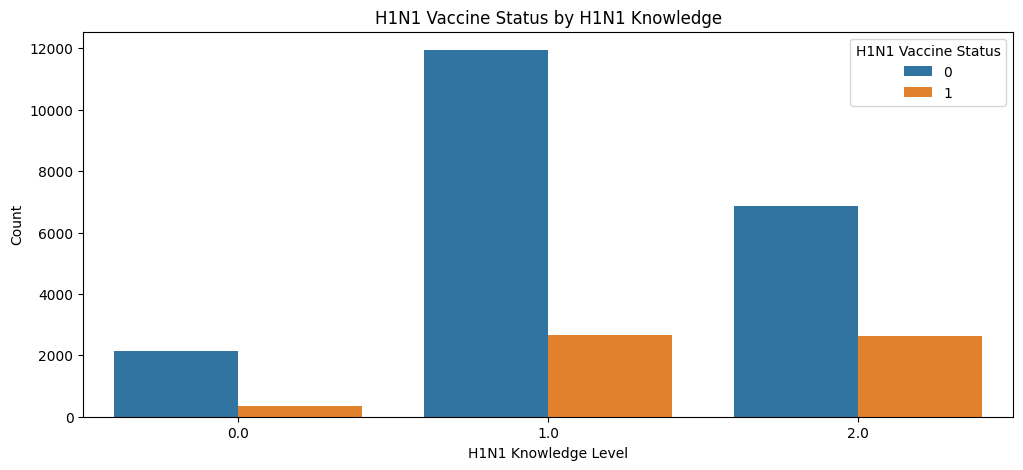

In [128]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="h1n1_knowledge", hue=df["h1n1_vaccine"])
plt.title("H1N1 Vaccine Status by H1N1 Knowledge")
plt.xlabel("H1N1 Knowledge Level")
plt.ylabel("Count")
plt.legend(title='H1N1 Vaccine Status')

two chart above shows, that someone that recieved vaccine got concern and knowledge about H1N1. there is also possibility of someone that concern and have the knowledge not getting vaccine because of have not met the chance to receive vaccine

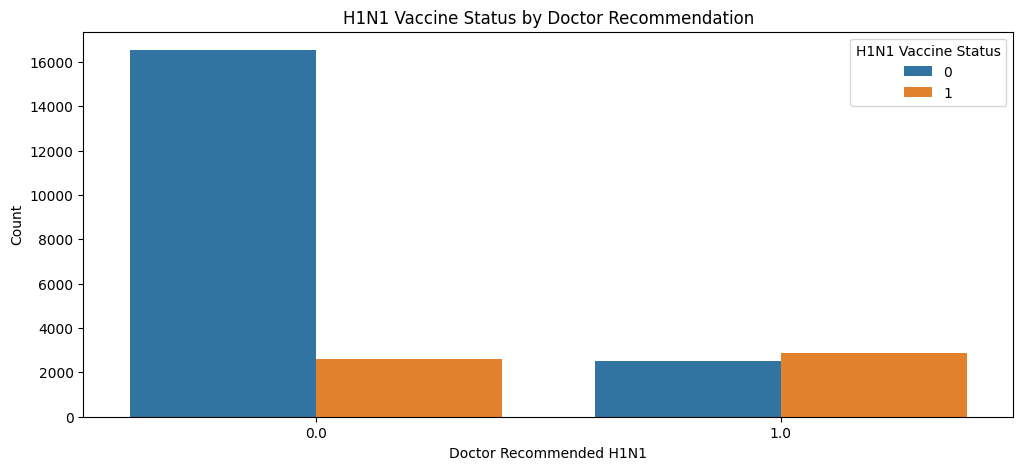

In [129]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="doctor_recc_h1n1", hue=df["h1n1_vaccine"])
plt.title("H1N1 Vaccine Status by Doctor Recommendation")
plt.xlabel("Doctor Recommended H1N1")
plt.ylabel("Count")
plt.legend(title='H1N1 Vaccine Status')

ratio between vaccined and getting recomendation yet not getting vaccine  is lower than not getting recomendation from doctor. doctor recomendation can help with information of beneficial and risk of H1N1 vaccine.

<Figure size 1200x500 with 0 Axes>

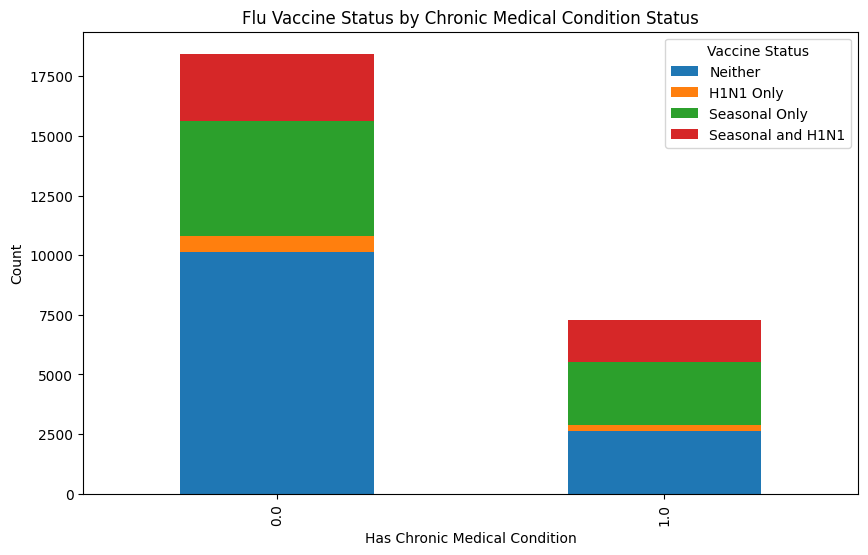

In [130]:
plt.figure(figsize=(12, 5))
grouped = df.groupby(['chronic_med_condition', 'seasonal_vaccine', 'h1n1_vaccine']).size().reset_index(name='count')

# Pivot the data to create a table with age as rows, vaccine status as columns, and count as values
pivoted = grouped.pivot(index='chronic_med_condition', columns=['seasonal_vaccine', 'h1n1_vaccine'], values='count')

ax = pivoted.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Has Chronic Medical Condition')
ax.set_ylabel('Count')
ax.set_title('Flu Vaccine Status by Chronic Medical Condition Status')
ax.legend(["Neither", "H1N1 Only", "Seasonal Only", "Seasonal and H1N1"], title='Vaccine Status')
plt.show()
# sns.countplot(data=df, x="chronic_med_condition", hue=df["h1n1_vaccine"])

chronic medication condition, decided to get vaccine, because the flu can be worsen the chronic desease

<Figure size 1200x500 with 0 Axes>

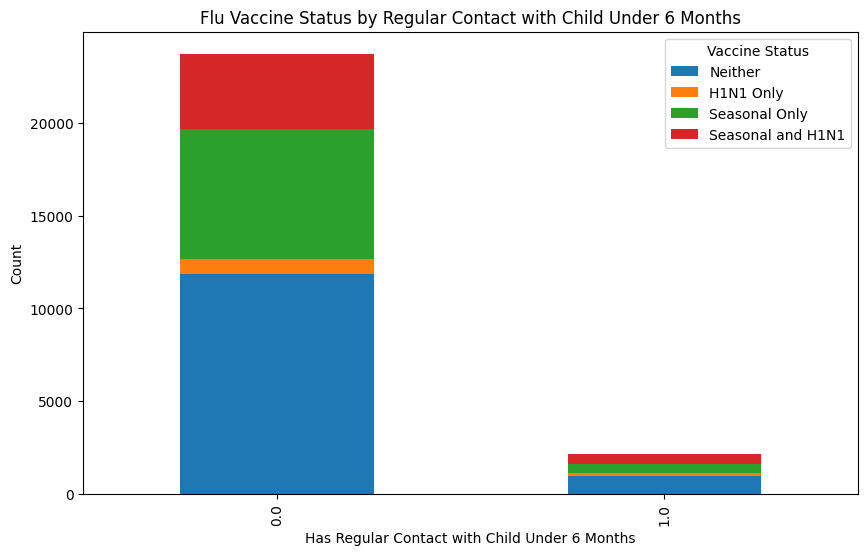

In [131]:
plt.figure(figsize=(12, 5))
grouped = df.groupby(['child_under_6_months', 'seasonal_vaccine', 'h1n1_vaccine']).size().reset_index(name='count')

# Pivot the data to create a table with age as rows, vaccine status as columns, and count as values
pivoted = grouped.pivot(index='child_under_6_months', columns=['seasonal_vaccine', 'h1n1_vaccine'], values='count')

ax = pivoted.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Has Regular Contact with Child Under 6 Months')
ax.set_ylabel('Count')
ax.set_title('Flu Vaccine Status by Regular Contact with Child Under 6 Months')
ax.legend(["Neither", "H1N1 Only", "Seasonal Only", "Seasonal and H1N1"], title='Vaccine Status')
plt.show()
# sns.countplot(data=df, x="child_under_6_months", hue=df["h1n1_vaccine"])

ratio of number of people that contatct with child under 6 months that vaccine and not, is so far, but most choosing not vaccine.

<Figure size 1200x500 with 0 Axes>

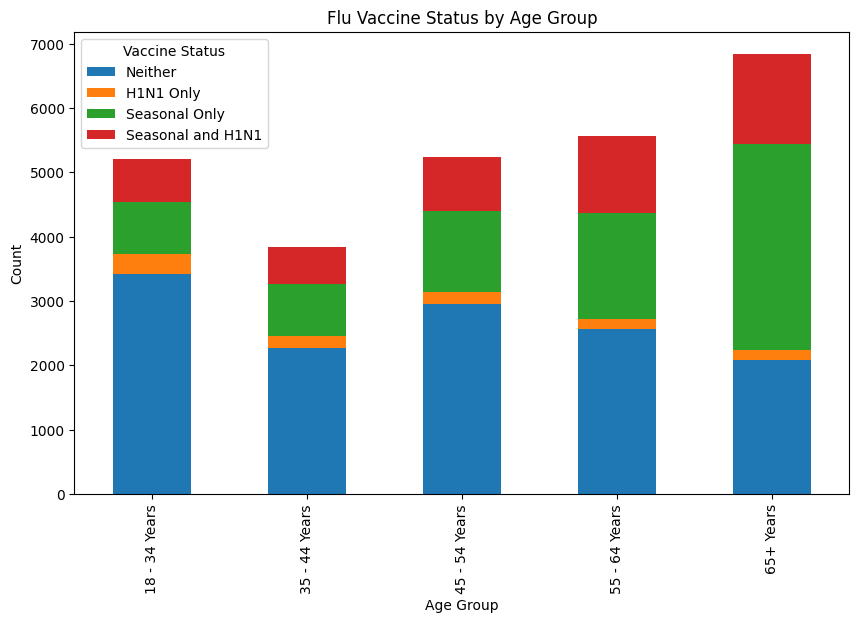

In [132]:
plt.figure(figsize=(12, 5))
grouped = df.groupby(['age_group', 'seasonal_vaccine', 'h1n1_vaccine']).size().reset_index(name='count')

# Pivot the data to create a table with age as rows, vaccine status as columns, and count as values
pivoted = grouped.pivot(index='age_group', columns=['seasonal_vaccine', 'h1n1_vaccine'], values='count')

ax = pivoted.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Flu Vaccine Status by Age Group')
ax.legend(["Neither", "H1N1 Only", "Seasonal Only", "Seasonal and H1N1"], title='Vaccine Status')
plt.show()
# sns.countplot(data=df, x="age_group", hue=df["h1n1_vaccine"])

age older someone they chose to be vaccined, this caused by the immunity that has be decreased

<Figure size 1200x500 with 0 Axes>

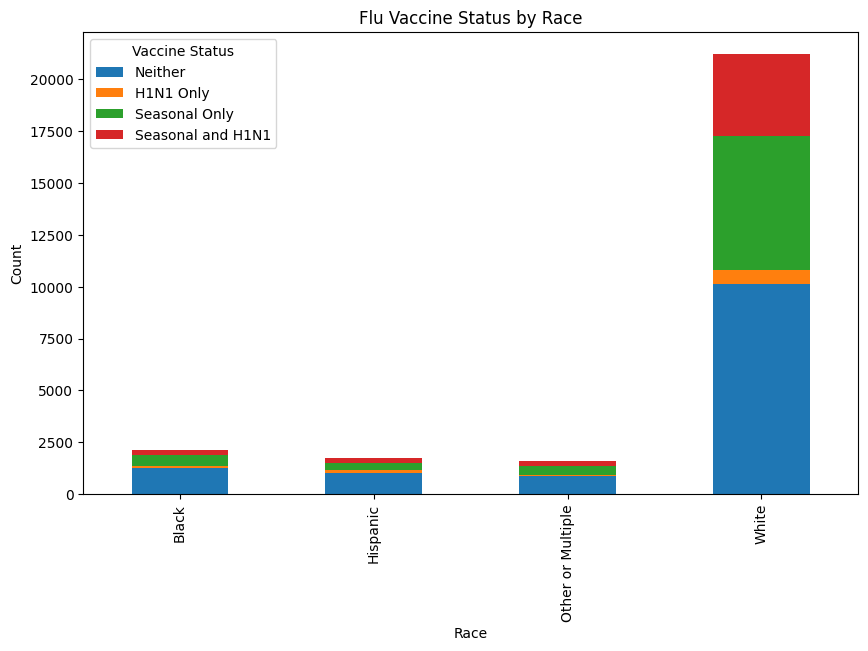

In [133]:
plt.figure(figsize=(12, 5))
grouped = df.groupby(['race', 'seasonal_vaccine', 'h1n1_vaccine']).size().reset_index(name='count')

# Pivot the data to create a table with age as rows, vaccine status as columns, and count as values
pivoted = grouped.pivot(index='race', columns=['seasonal_vaccine', 'h1n1_vaccine'], values='count')

ax = pivoted.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Race')
ax.set_ylabel('Count')
ax.set_title('Flu Vaccine Status by Race')
ax.legend(["Neither", "H1N1 Only", "Seasonal Only", "Seasonal and H1N1"], title='Vaccine Status')
plt.show()
# sns.countplot(data=df, x="race", hue=df["h1n1_vaccine"])

majority of respondent is from white race.

<Figure size 1200x500 with 0 Axes>

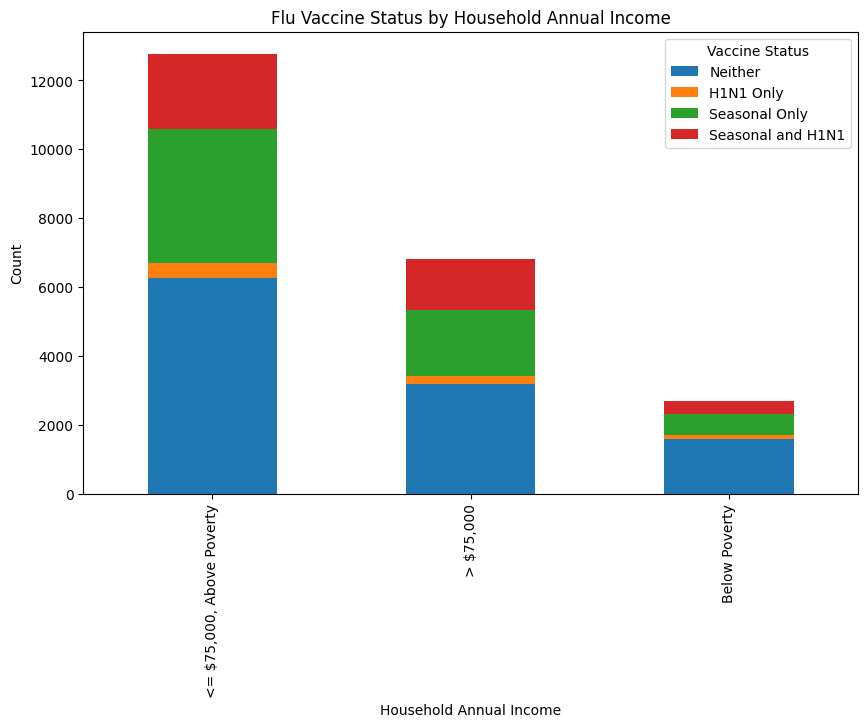

In [134]:
plt.figure(figsize=(12, 5))
grouped = df.groupby(['income_poverty', 'seasonal_vaccine', 'h1n1_vaccine']).size().reset_index(name='count')

# Pivot the data to create a table with age as rows, vaccine status as columns, and count as values
pivoted = grouped.pivot(index='income_poverty', columns=['seasonal_vaccine', 'h1n1_vaccine'], values='count')

ax = pivoted.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Household Annual Income')
ax.set_ylabel('Count')
ax.set_title('Flu Vaccine Status by Household Annual Income')
ax.legend(["Neither", "H1N1 Only", "Seasonal Only", "Seasonal and H1N1"], title='Vaccine Status')
plt.show()
# sns.countplot(data=df, x="income_poverty", hue=df["h1n1_vaccine"])

most of vaccined people, come from high economy class that far from porverty

<Figure size 1200x500 with 0 Axes>

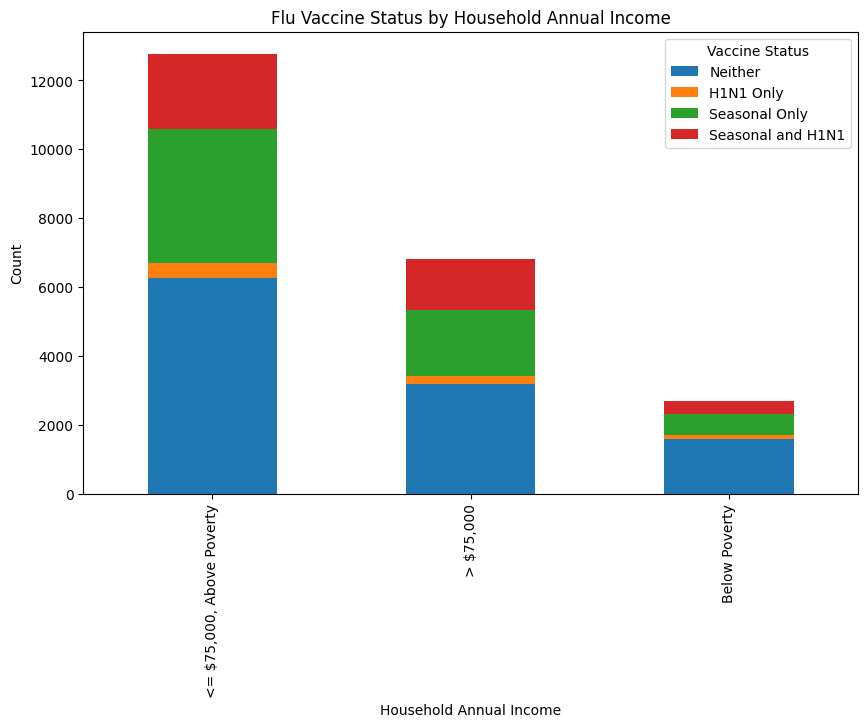

In [135]:
plt.figure(figsize=(12, 5))
grouped = df.groupby(['income_poverty', 'seasonal_vaccine', 'h1n1_vaccine']).size().reset_index(name='count')

# Pivot the data to create a table with age as rows, vaccine status as columns, and count as values
pivoted = grouped.pivot(index='income_poverty', columns=['seasonal_vaccine', 'h1n1_vaccine'], values='count')

ax = pivoted.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Household Annual Income')
ax.set_ylabel('Count')
ax.set_title('Flu Vaccine Status by Household Annual Income')
ax.legend(["Neither", "H1N1 Only", "Seasonal Only", "Seasonal and H1N1"], title='Vaccine Status')
plt.show()
# sns.countplot(data=df, x="income_poverty", hue=df["h1n1_vaccine"])

<Figure size 1200x500 with 0 Axes>

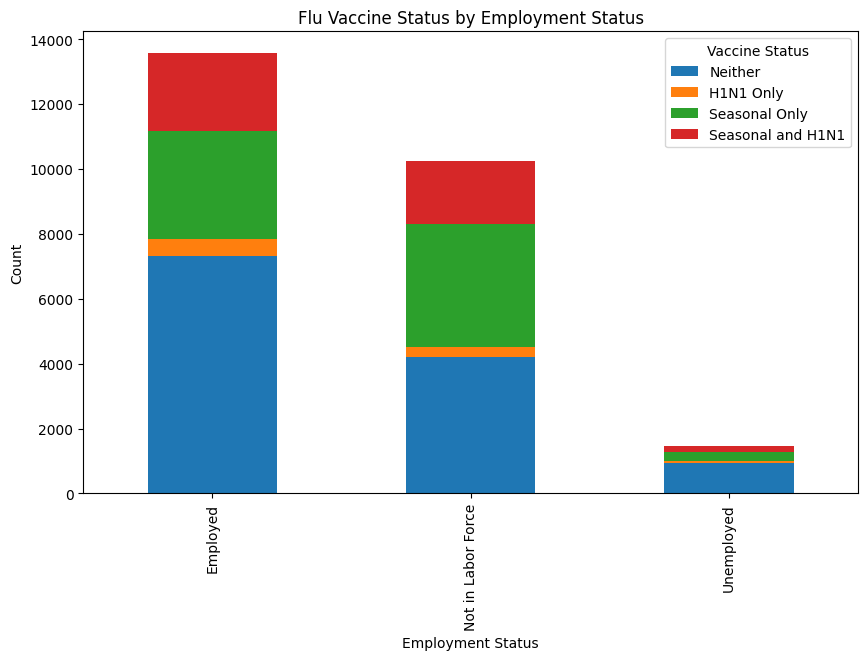

In [136]:
plt.figure(figsize=(12, 5))
grouped = df.groupby(['employment_status', 'seasonal_vaccine', 'h1n1_vaccine']).size().reset_index(name='count')

# Pivot the data to create a table with age as rows, vaccine status as columns, and count as values
pivoted = grouped.pivot(index='employment_status', columns=['seasonal_vaccine', 'h1n1_vaccine'], values='count')

ax = pivoted.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Employment Status')
ax.set_ylabel('Count')
ax.set_title('Flu Vaccine Status by Employment Status')
ax.legend(["Neither", "H1N1 Only", "Seasonal Only", "Seasonal and H1N1"], title='Vaccine Status')
plt.show()
# sns.countplot(data=df, x="employment_status", hue=df["h1n1_vaccine"])

two chart from above shows that someone with jobs and housing has higher probability of being vaccined.

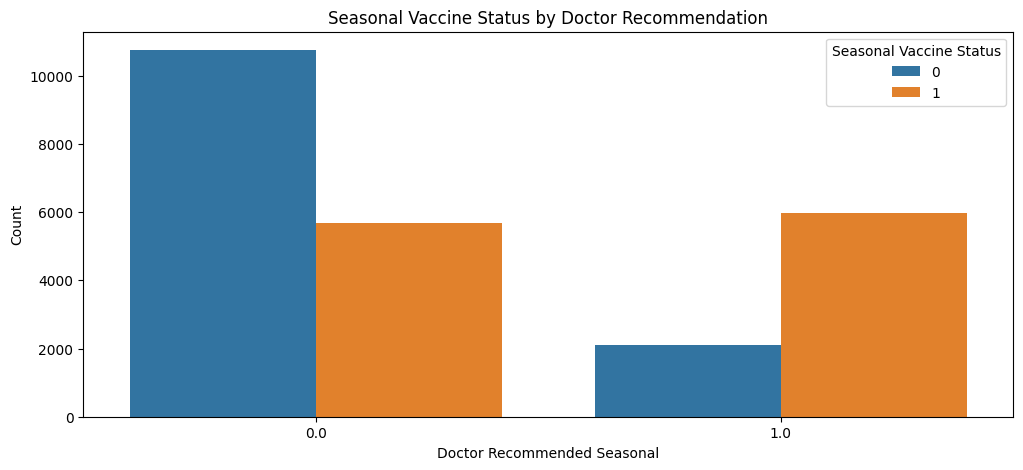

In [137]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="doctor_recc_seasonal", hue=df["seasonal_vaccine"])
plt.title("Seasonal Vaccine Status by Doctor Recommendation")
plt.xlabel("Doctor Recommended Seasonal")
plt.ylabel("Count")
plt.legend(title='Seasonal Vaccine Status')

most of respondent not getting vaccined after recommended then geting vaccined after recommended.

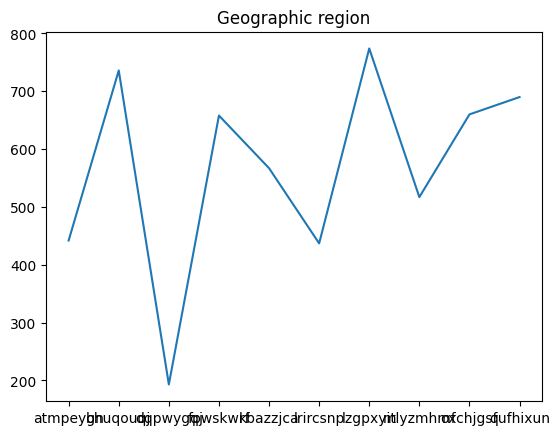

In [138]:
data = pd.merge(features, labels)
df = data[data["h1n1_vaccine"] == 1].groupby(data['hhs_geo_region']).sum()
plt.title('Geographic region')
plt.plot(df['h1n1_vaccine'])
plt.show()

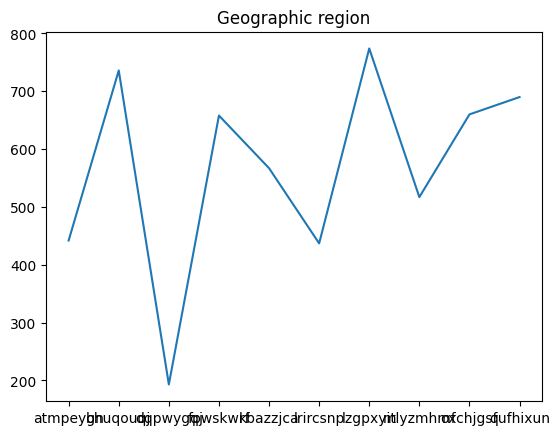

In [139]:
df = data[data["h1n1_vaccine"] == 1].groupby(data['hhs_geo_region']).sum()
plt.title('Geographic region')
plt.plot(df['h1n1_vaccine'])
plt.show()

# Data Preprocessing

checking is there any duplicated row in the dataset

In [140]:
features.duplicated().sum()

0

In [141]:
labels.duplicated().sum()

0

checking the count of missing value from features and labels

In [142]:
features.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [143]:
labels.isnull().sum()

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

Using Label Encoder from scikit learn to encode the string value to numerical

In [144]:
le = LabelEncoder()

for col in features.columns:
    if features[col].dtype == 'object':
        features[col] = le.fit_transform(features[col].astype(str))

Creating new Column to represent health_insurance because 50% data is missing

In [145]:
features['health_insurance_missing'] = features['health_insurance'].isna().astype(int)
features = features.drop(['health_insurance'], axis=1)

Using interativeImputer from fancyImpute to fill the missing value.

In [146]:
mice_imputer = IterativeImputer()

cols_with_missing = features.columns[features.isna().any()].tolist()
id
for col in cols_with_missing:
    features[col] = mice_imputer.fit_transform(features[[col]])

check once again to see if the missing value is filled

In [147]:
features.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

# FEATURE ENGINEERING

checking the 5 first row again to make sure the changes

In [148]:
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,health_insurance_missing
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,0,1,8,2,0.0,0.0,10,11,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,1,0,1,0,0.0,0.0,13,20,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,9,0,2.0,0.0,15,22,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,1,1,5,1,0.0,0.0,10,11,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,9,0,1.0,0.0,19,5,1


checking the columns in features

In [149]:
features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'health_insurance_missing'],
      dtype='object')

scaling the features from the dataset and make it into seperate dataframe

In [150]:
scaler =  MinMaxScaler()

feature_scaled = scaler.fit_transform(features)

In [151]:
feature_scaled = pd.DataFrame(feature_scaled)
feature_scaled.columns = features.columns
feature_scaled

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,health_insurance_missing
0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,0.5,0.0,0.333333,0.888889,1.0,0.000000,0.0,0.476190,0.478261,0.0
1,0.000037,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,...,0.5,0.5,0.000000,0.111111,0.0,0.000000,0.0,0.619048,0.869565,0.0
2,0.000075,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.5,0.0,0.000000,1.000000,0.0,0.666667,0.0,0.714286,0.956522,1.0
3,0.000112,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,...,0.5,0.5,0.333333,0.555556,0.5,0.000000,0.0,0.476190,0.478261,1.0
4,0.000150,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,...,0.0,0.0,0.000000,1.000000,0.0,0.333333,0.0,0.904762,0.217391,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.999850,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,...,0.5,0.0,0.333333,1.000000,1.0,0.000000,0.0,0.476190,0.478261,1.0
26703,0.999888,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,...,0.5,0.5,0.000000,0.666667,0.5,0.333333,0.0,0.190476,0.086957,0.0
26704,0.999925,0.666667,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,...,0.5,0.0,1.000000,0.666667,0.0,0.000000,0.0,0.476190,0.478261,1.0
26705,0.999963,0.333333,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.677264,...,0.0,0.5,0.000000,0.555556,1.0,0.333333,0.0,0.190476,0.260870,0.0


checking correlation between each features with the target variables

In [152]:
features.corrwith(labels.h1n1_vaccine)

respondent_id                 -0.003280
h1n1_concern                   0.121747
h1n1_knowledge                 0.117714
behavioral_antiviral_meds      0.040518
behavioral_avoidance           0.047538
behavioral_face_mask           0.070464
behavioral_wash_hands          0.074663
behavioral_large_gatherings    0.017798
behavioral_outside_home        0.021742
behavioral_touch_face          0.071518
doctor_recc_h1n1               0.384662
doctor_recc_seasonal           0.204946
chronic_med_condition          0.093612
child_under_6_months           0.066045
health_worker                  0.167490
opinion_h1n1_vacc_effective    0.267491
opinion_h1n1_risk              0.320833
opinion_h1n1_sick_from_vacc    0.074548
opinion_seas_vacc_effective    0.177786
opinion_seas_risk              0.256192
opinion_seas_sick_from_vacc    0.008284
age_group                      0.041074
education                      0.024694
race                           0.041061
sex                           -0.020672


In [153]:
features.corrwith(labels.seasonal_vaccine)

respondent_id                 -0.004652
h1n1_concern                   0.154561
h1n1_knowledge                 0.119889
behavioral_antiviral_meds      0.006268
behavioral_avoidance           0.076096
behavioral_face_mask           0.050065
behavioral_wash_hands          0.112327
behavioral_large_gatherings    0.063920
behavioral_outside_home        0.053426
behavioral_touch_face          0.119938
doctor_recc_h1n1               0.190631
doctor_recc_seasonal           0.354363
chronic_med_condition          0.167116
child_under_6_months           0.011914
health_worker                  0.125423
opinion_h1n1_vacc_effective    0.203601
opinion_h1n1_risk              0.215083
opinion_h1n1_sick_from_vacc    0.027206
opinion_seas_vacc_effective    0.358802
opinion_seas_risk              0.386410
opinion_seas_sick_from_vacc   -0.060906
age_group                      0.277454
education                      0.002024
race                           0.101743
sex                           -0.077091


creating a heatmap to see the correlation between each features

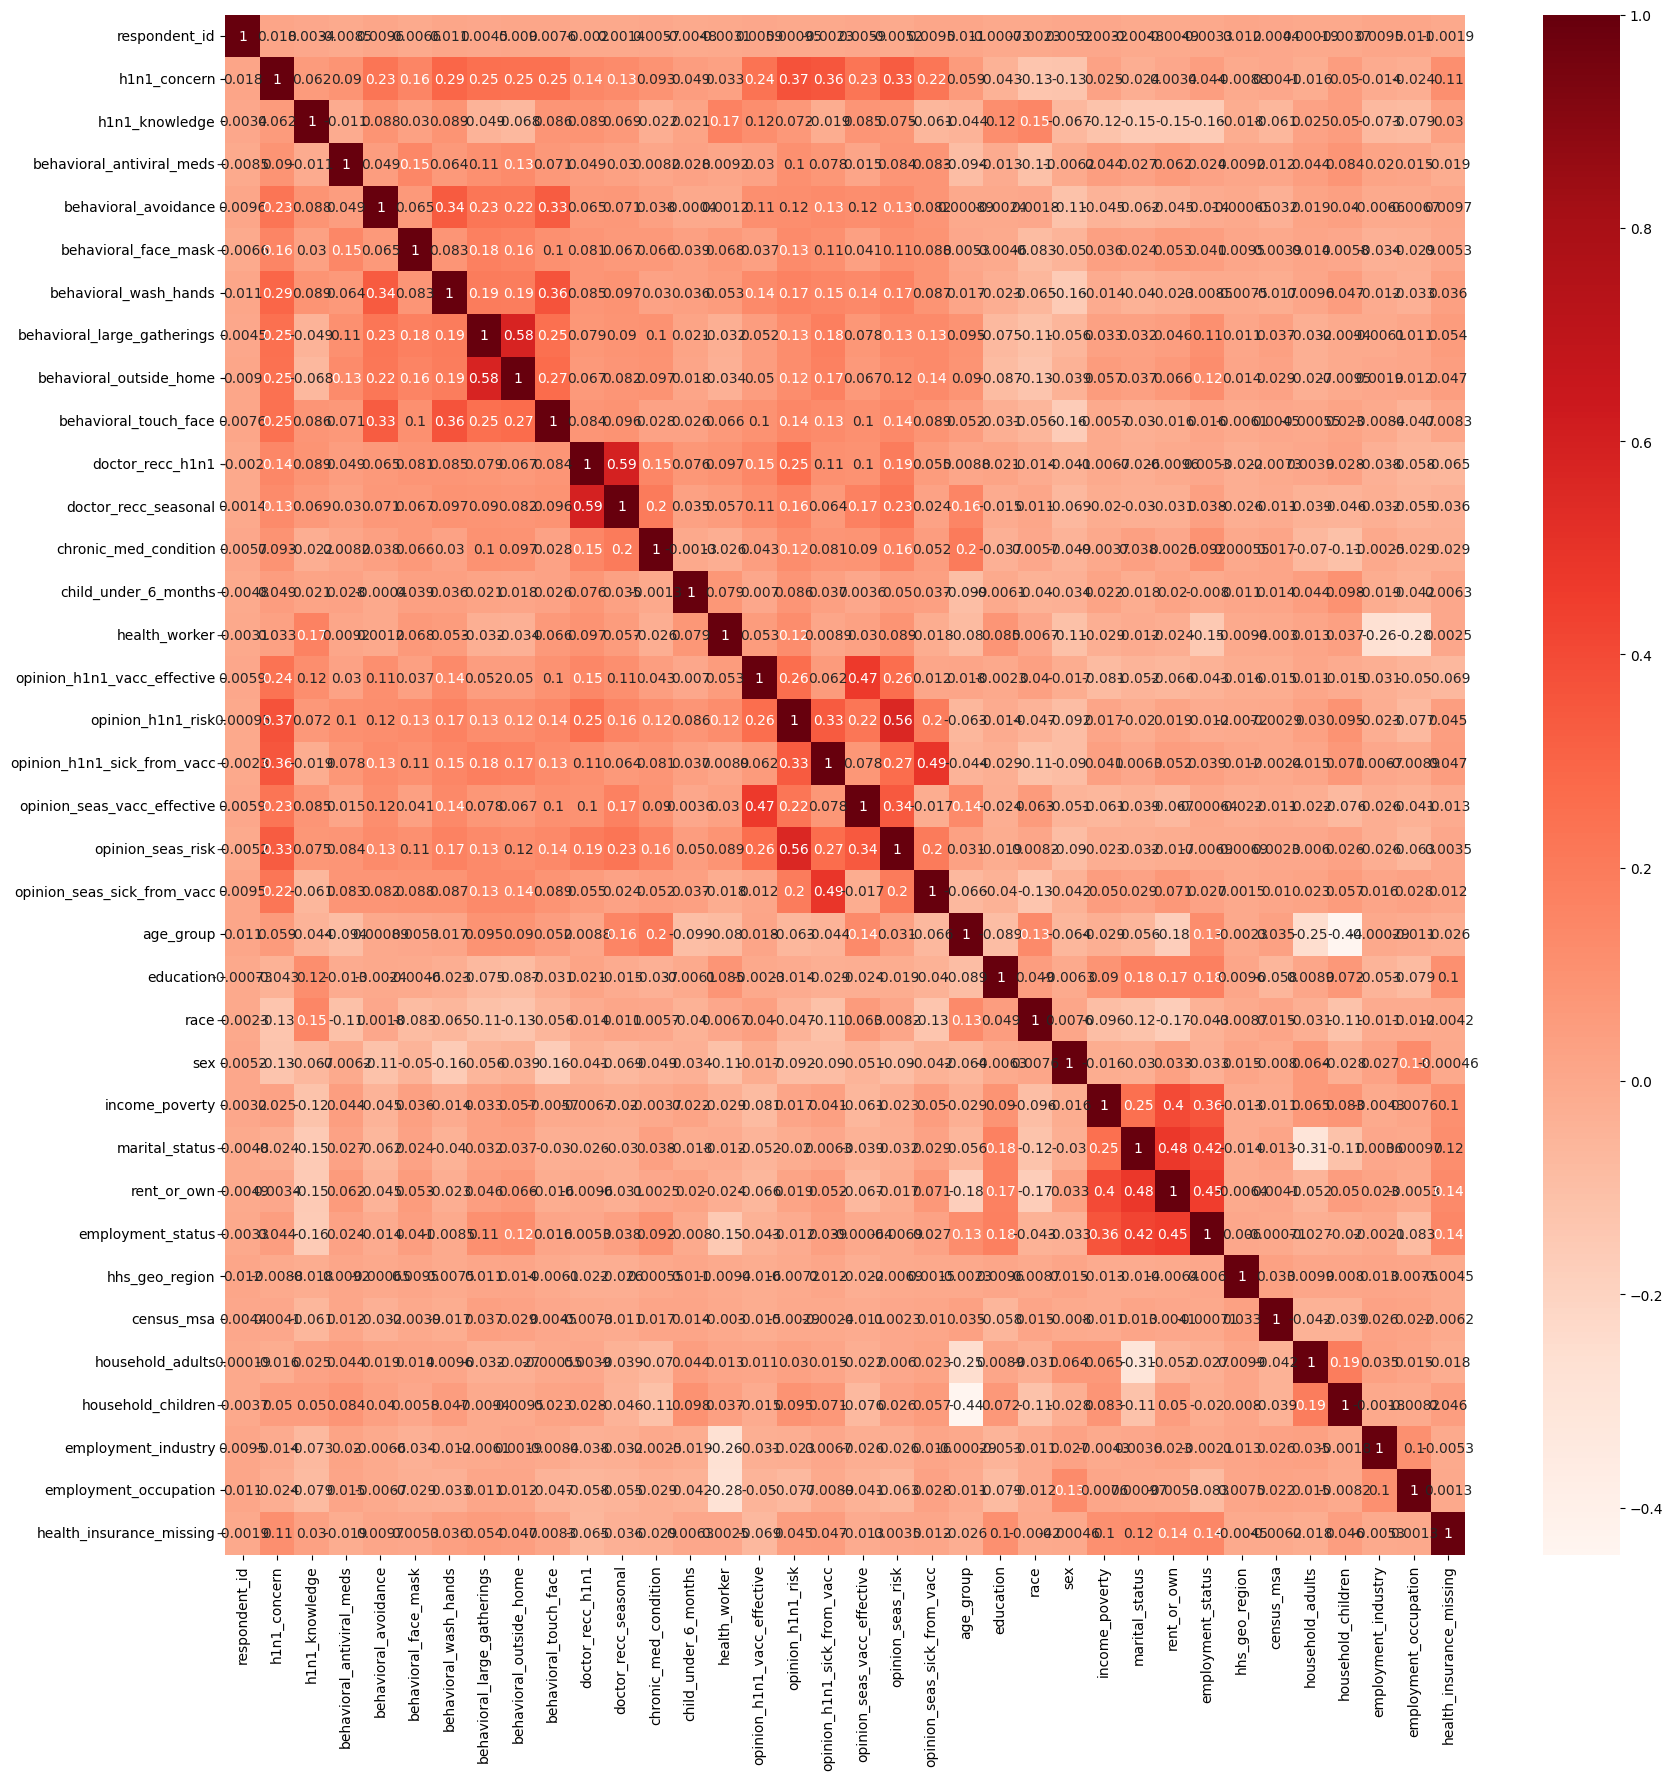

In [154]:
corrmat = features.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# heat map
g=sns.heatmap(features[top_corr_features].corr(),annot=True,cmap="Reds")

# CREATING PREDICTIVE MODEL

selecting feature and labels for predictive model

In [155]:
# EXPERIMENT WITH DROPPED COLUMNS
X = feature_scaled.drop(["employment_industry","employment_occupation", "hhs_geo_region", "respondent_id",
                       "h1n1_concern", "h1n1_knowledge"], axis=1)
y = labels.drop(['respondent_id'], axis=1)

splitting the dataset into train and test

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state= 25)

trying out some predictive model algorithms 

In [157]:
model_LR = BinaryRelevance(LogisticRegression())

# modeling
model_LR.fit(X_train, y_train)

BinaryRelevance(classifier=LogisticRegression(), require_dense=[True, True])

In [158]:
y_pred_LR = model_LR.predict(X_test)

In [159]:
BR_LR = roc_auc_score(y_test, y_pred_LR.toarray())
BR_LR

0.7461548164164427

In [160]:
model_DT = BinaryRelevance(DecisionTreeClassifier())

# modeling
model_DT.fit(X_train, y_train)

BinaryRelevance(classifier=DecisionTreeClassifier(), require_dense=[True, True])

In [161]:
y_pred_DT = model_DT.predict(X_test)

In [162]:
BR_DT = roc_auc_score(y_test, y_pred_DT.toarray())
BR_DT

0.6812686811229863

In [163]:
model_RF = RandomForestClassifier()

# modeling
model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [164]:
y_pred_RF = model_RF.predict(X_test)

In [166]:
BR_RF = roc_auc_score(y_test, y_pred_RF)
BR_RF

0.7406710849411319

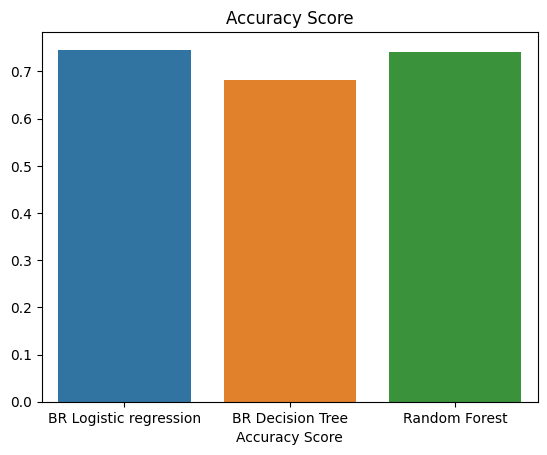

In [167]:
Accuracy_Score = [BR_LR, BR_DT, BR_RF]
Models = ['BR Logistic regression', 'BR Decision Tree' , 'Random Forest']
sns.barplot(y=Accuracy_Score, x=Models)
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score')
plt.show()

from the comparation chart of the tree models we created shows that Binary Relevance Logistic Regression got the best accuracy so we use that algoritms for the model

# Testing the model with new data

reading test feature and set the data to match with the predictive model requirment

In [ ]:
test_data = pd.read_csv("test_set_features.csv")
test_data = test_data.drop(["employment_industry","employment_occupation", "hhs_geo_region", "respondent_id",
                       "h1n1_concern", "h1n1_knowledge"], axis=1)

checking the test data missing value

In [ ]:
test_data.isnull().sum()

behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
marital_status                  1442
rent_or_own                     2036
employment_status               1471
c

encoding string to numerical

In [ ]:
for col in test_data.columns:
    # check if column data type is object
    if test_data[col].dtype == 'object':
        # apply label encoding
        test_data[col] = le.fit_transform(test_data[col].astype(str))

creating the new columns for health insurance missing value

In [ ]:
test_data['health_insurance_missing'] = test_data['health_insurance'].isna().astype(int)
test_data = test_data.drop(['health_insurance'], axis=1)

filling the missing data for test data

In [ ]:
cols_with_missing = test_data.columns[test_data.isna().any()].tolist()

imputer = IterativeImputer()
for col in cols_with_missing:
    test_data[col] = imputer.fit_transform(test_data[[col]])

checking the test data set to make sure no missing data

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26708 non-null  float64
 1   behavioral_avoidance         26708 non-null  float64
 2   behavioral_face_mask         26708 non-null  float64
 3   behavioral_wash_hands        26708 non-null  float64
 4   behavioral_large_gatherings  26708 non-null  float64
 5   behavioral_outside_home      26708 non-null  float64
 6   behavioral_touch_face        26708 non-null  float64
 7   doctor_recc_h1n1             26708 non-null  float64
 8   doctor_recc_seasonal         26708 non-null  float64
 9   chronic_med_condition        26708 non-null  float64
 10  child_under_6_months         26708 non-null  float64
 11  health_worker                26708 non-null  float64
 12  opinion_h1n1_vacc_effective  26708 non-null  float64
 13  opinion_h1n1_ris

scaling the features of test data

In [ ]:
features.columns

scaler =  MinMaxScaler()

test_data_scaled = scaler.fit_transform(test_data)

test_data_scaled = pd.DataFrame(test_data_scaled)
test_data_scaled.columns = test_data.columns
test_data_scaled

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,health_insurance_missing
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.333333,0.0,0.333333,0.5,0.5,0.000000,0.0,0.333333,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.0,0.666667,0.5,0.5,0.000000,1.0,1.000000,0.000000,0.0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.000000,1.0,0.333333,0.0,0.0,0.000000,1.0,0.333333,0.000000,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.000000,0.0,0.000000,0.0,0.0,0.333333,0.0,0.333333,0.000000,0.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.5,0.0,0.000000,1.0,0.000000,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.000000,0.0,1.000000,1.0,1.0,1.000000,0.5,0.333333,0.333333,1.0
26704,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.000000,1.0,0.666667,0.0,0.5,0.000000,1.0,0.333333,1.000000,0.0
26705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.666667,0.5,0.5,0.333333,0.0,0.333333,0.000000,0.0
26706,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.000000,0.0,0.0,0.333333,0.0,0.333333,0.000000,1.0


predicting the target variable using the scaled data

In [ ]:
vaccines = model_LR.predict(test_data_scaled)

change the prediction result to dataframe

In [ ]:
testdf = pd.DataFrame(vaccines.toarray(), columns=['h1n1_vaccine', 'seasonal_vaccine'])

checking the testdf dataframe

In [ ]:
testdf

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
26703,0,0
26704,0,0
26705,0,0
26706,0,0


reading test data set features once more to get the respondent id

In [ ]:
row_id = pd.read_csv('test_set_features.csv')

then merge it with testdf

In [ ]:
new_col = row_id['respondent_id'].reset_index(drop=True)
merged_df = pd.concat([new_col, testdf], axis=1)

check new merged df whether it compatible with submission format

In [ ]:
merged_df

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0,0
1,26708,0,0
2,26709,0,1
3,26710,0,1
4,26711,0,0
...,...,...,...
26703,53410,0,0
26704,53411,0,0
26705,53412,0,0
26706,53413,0,0


export merged_df to submission.csv

In [ ]:
merged_df.to_csv('submission3.csv', index=False)